In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tri-County Restaurant Inspection Data

In [2]:
# Read CSV
restaurants = pd.read_csv("../raw-data.csv", index_col=None)

In [3]:
# Clean data
df = restaurants.fillna("0")
df.head()

facility_id  record_id serial_number         service_desc    pe  \
0   FA0009996  PR0011864     DAYR2RKBT  Inspection, Routine  1045   
1   FA0011070  PR0012733     DANHOPAEL  Inspection, Routine  1007   
2   FA0010971  PR0012573     DAFZVKMMB  Inspection, Routine  1007   
3   FA0008454  PR0011453     DAA6ICOWD  Inspection, Routine  1045   
4   FA0003507  PR0010770     DATCQ0VC0  Inspection, Routine  1025   

                                     pe_desc risk_category  \
0               Restaurant (101 - 200 seats)  Med Risk (3)   
1  Limited Food Service (convenience, other)  Low Risk (2)   
2  Limited Food Service (convenience, other)  Low Risk (2)   
3               Restaurant (101 - 200 seats)  Med Risk (3)   
4                 Restaurant (0 - 100 seats)  Med Risk (3)   

          description    county                        agency  ... FC48 FC49  \
0  Food - Restaurants  Arapahoe  Tri-County Health Department  ...    0    1   
1  Food - Restaurants  Arapahoe  Tri-County Health Department  ...    0    0   
2  Food - Restaurants  Arapahoe  Tri-County Health Department  ...    0    0   
3  Food - Restaurants  Arapahoe  Tri-County Health Department  ...    0    0   
4  Food - Restaurants   Douglas  Tri-County Health Department  ...    0    0   

  FC50 FC51 FC52 FC53 FC54 FC55  FC56  good_retail_practices_violations  
0    0    1    0    0    0    0     0                                 4  
1    0    1    0    0    0    0     0                                 1  
2    0    0    0    0    0    0     0                                 0  
3    0    0    0    0    0    0     0                                 1  
4    0    0    0    0    0    1     0                                 7  

[5 rows x 76 columns]

In [4]:
# Total Facility IDs
total_facilities = df["facility_id"].nunique()
total_facilities

3946

In [5]:
# Remove Duplicates for most recent data
df_clean = df.drop_duplicates('facility_id', keep='last')
df_clean.head()

facility_id  record_id serial_number         service_desc    pe  \
1   FA0011070  PR0012733     DANHOPAEL  Inspection, Routine  1007   
2   FA0010971  PR0012573     DAFZVKMMB  Inspection, Routine  1007   
5   FA0010794  PR0012294     DAPVP0EVJ  Inspection, Routine  1007   
6   FA0009996  PR0011864     DAK7PEH1S  Inspection, Routine  1045   
8   FA0002354  PR0012095     DA0JU6EXD  Inspection, Routine  1007   

                                     pe_desc      risk_category  \
1  Limited Food Service (convenience, other)       Low Risk (2)   
2  Limited Food Service (convenience, other)       Low Risk (2)   
5  Limited Food Service (convenience, other)       Low Risk (2)   
6               Restaurant (101 - 200 seats)       Med Risk (3)   
8  Limited Food Service (convenience, other)  Very Low Risk (1)   

          description    county                        agency  ... FC48 FC49  \
1  Food - Restaurants  Arapahoe  Tri-County Health Department  ...    0    0   
2  Food - Restaurants  Arapahoe  Tri-County Health Department  ...    0    0   
5      Food - Grocery  Arapahoe  Tri-County Health Department  ...    0    0   
6  Food - Restaurants  Arapahoe  Tri-County Health Department  ...    0    1   
8      Food - Grocery  Arapahoe  Tri-County Health Department  ...    0    0   

  FC50 FC51 FC52 FC53 FC54 FC55  FC56  good_retail_practices_violations  
1    0    1    0    0    0    0     0                                 1  
2    0    0    0    0    0    0     0                                 0  
5    0    1    0    0    0    0     0                                 1  
6    0    0    0    0    1    1     0                                 5  
8    0    0    0    0    0    0     0                                 0  

[5 rows x 76 columns]

In [6]:
# Categorical Breakdown
pe_inspections = df_clean['pe_desc'].value_counts()
pe_inspections.index.name = 'loc_description'
pe_inspections.to_csv('pe_description.csv')
pe_inspections

loc_description
Restaurant (0 - 100 seats)                     1867
Restaurant (101 - 200 seats)                    514
Limited Food Service (convenience, other)       505
No fee license (K-12 schools, non-profit)       409
Restaurant (>200 seats)                         275
Grocery Store w/ Deli (0 - 15,000 sq. ft.)      130
Grocery Store w/ Deli (>15,000 sq. ft.)         127
Grocery Store (0 - 15,000 sq. ft.)              103
Grocery Store (>15,000 sq. ft.)                  15
Change of Owner (Initial Inspection) - Food       1
Name: pe_desc, dtype: int64

In [7]:
# Group by and filter by Restaurant size, Risk factor
restaurant_risk = df_clean.groupby(["risk_category", "pe_desc"])['program_id'].count()
restaurant_risk.to_csv('risk.csv')
restaurant_risk

risk_category      pe_desc                                    
High Risk (4)      Grocery Store w/ Deli (0 - 15,000 sq. ft.)        9
                   Grocery Store w/ Deli (>15,000 sq. ft.)           5
                   No fee license (K-12 schools, non-profit)         5
                   Restaurant (0 - 100 seats)                       53
                   Restaurant (101 - 200 seats)                     29
                   Restaurant (>200 seats)                          37
Low Risk (2)       Grocery Store (0 - 15,000 sq. ft.)               17
                   Grocery Store w/ Deli (0 - 15,000 sq. ft.)       14
                   Limited Food Service (convenience, other)       158
                   No fee license (K-12 schools, non-profit)        21
                   Restaurant (0 - 100 seats)                      199
                   Restaurant (101 - 200 seats)                      8
                   Restaurant (>200 seats)                           1
Med Risk (3)  

In [8]:
# Group by county, city
geographic_df = df_clean.groupby(["county", "city"])['program_id'].count()
geographic_df.to_csv('geographic.csv')
geographic_df

county    city                
Adams     Arvada                   18
          Aurora                   95
          Bennett                  10
          Brighton                145
          Broomfield                2
          Byers                     1
          Commerce City           134
          Denver                  124
          Eastlake                  2
          Federal Heights          50
          Henderson                17
          Northglenn               97
          Strasburg                 6
          Thornton                321
          Watkins                   4
          Westminster             250
Arapahoe  Aurora                  872
          Bennett                   2
          Byers                     2
          Centennial              213
          Cherry Hills Village      6
          Columbine Valley          1
          Deer Trail                2
          Denver                   46
          Englewood               212
          Foxfield 

In [9]:
# Number of each location's "Total Foodborne Illness Risk Violations" &
# Number of each location's "Total Good Retail Practices Violations"
violations = df_clean.groupby(["program_id", "county", "site_address"])\
["foodborne_illness_violations", "good_retail_practices_violations"].sum()

violations.loc[:,'total_violations'] = violations['foodborne_illness_violations'] + \
                                       violations['good_retail_practices_violations']

# Form new columns: total_violations & inspScore
violations['total_violations'] = violations['foodborne_illness_violations'] + violations['good_retail_practices_violations']
violations.loc[:,'inspScore'] = 56-violations['total_violations']

violations.to_csv('violations.csv')
violations.head(10)

<ipython-input-9-8c24f17902d3>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  violations = df_clean.groupby(["program_id", "county", "site_address"])\


foodborne_illness_violations  \
program_id             county   site_address                                                  
1 UP Greenwood Village Arapahoe 6864 S Clinton Ct                                         2   
123 Pho                Douglas  11804 E Oswego St Unit C                                  4   
125 Chinese Restaurant Adams    10255 Washington St                                       3   
135 Scoop              Arapahoe 3494 S Federal Blvd                                       7   
20 Mile Tap House      Douglas  12543 N Highway 83                                        1   
212 Pizza Co           Douglas  848 N Ridge Rd Unit F                                     2   
3 Margaritas           Adams    14697 Delaware St Unit 800                                3   
                                3202 E 104th Ave                                         12   
                                530 E Bromley Ln Unit 125                                 4   
                       Arapahoe 25791 E Smoky Hill Rd Ste 100                             2   

                                                               good_retail_practices_violations  \
program_id             county   site_address                                                      
1 UP Greenwood Village Arapahoe 6864 S Clinton Ct                                             6   
123 Pho                Douglas  11804 E Oswego St Unit C                                      4   
125 Chinese Restaurant Adams    10255 Washington St                                           6   
135 Scoop              Arapahoe 3494 S Federal Blvd                                           8   
20 Mile Tap House      Douglas  12543 N Highway 83                                            4   
212 Pizza Co           Douglas  848 N Ridge Rd Unit F                                         0   
3 Margaritas           Adams    14697 Delaware St Unit 800                                    4   
                                3202 E 104th Ave                                              9   
                                530 E Bromley Ln Unit 125                                     8   
                       Arapahoe 25791 E Smoky Hill Rd Ste 100                                 5   

                                                               total_violations  \
program_id             county   site_address                                      
1 UP Greenwood Village Arapahoe 6864 S Clinton Ct                             8   
123 Pho                Douglas  11804 E Oswego St Unit C                      8   
125 Chinese Restaurant Adams    10255 Washington St                           9   
135 Scoop              Arapahoe 3494 S Federal Blvd                          15   
20 Mile Tap House      Douglas  12543 N Highway 83                            5   
212 Pizza Co           Douglas  848 N Ridge Rd Unit F                         2   
3 Margaritas           Adams    14697 Delaware St Unit 800                    7   
                                3202 E 104th Ave                             21   
                                530 E Bromley Ln Unit 125                    12   
                       Arapahoe 25791 E Smoky Hill Rd Ste 100                 7   

                                                               inspScore  
program_id             county   site_address                              
1 UP Greenwood Village Arapahoe 6864 S Clinton Ct                     48  
123 Pho                Douglas  11804 E Oswego St Unit C              48  
125 Chinese Restaurant Adams    10255 Washington St                   47  
135 Scoop              Arapahoe 3494 S Federal Blvd                   41  
20 Mile Tap House      Douglas  12543 N Highway 83                    51  
212 Pizza Co           Douglas  848 N Ridge Rd Unit F                 54  
3 Margaritas           Adams    14697 Delaware St Unit 800            49  
                                3202 E 104th Ave             

In [10]:
# Are programs with multiple locations violating at all places?
programs_df = violations.groupby(["program_id", "county", "site_address"])["total_violations"].sum()
programs_df.to_csv('programs.csv')
programs_df.head(10)

program_id              county    site_address                 
1 UP Greenwood Village  Arapahoe  6864 S Clinton Ct                 8
123 Pho                 Douglas   11804 E Oswego St Unit C          8
125 Chinese Restaurant  Adams     10255 Washington St               9
135 Scoop               Arapahoe  3494 S Federal Blvd              15
20 Mile Tap House       Douglas   12543 N Highway 83                5
212 Pizza Co            Douglas   848 N Ridge Rd Unit F             2
3 Margaritas            Adams     14697 Delaware St Unit 800        7
                                  3202 E 104th Ave                 21
                                  530 E Bromley Ln Unit 125        12
                        Arapahoe  25791 E Smoky Hill Rd Ste 100     7
Name: total_violations, dtype: int64

county
Adams       3576
Arapahoe    5309
Douglas     1819
Name: foodborne_illness_violations, dtype: int64 county
Adams       4431
Arapahoe    5517
Douglas     2863
Name: good_retail_practices_violations, dtype: int64


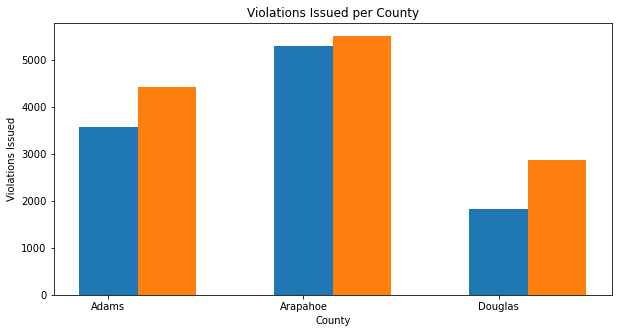

county
Adams        8007
Arapahoe    10826
Douglas      4682
dtype: int64


In [11]:
# Barchart of county violations issued

foodborne = violations.groupby(["county"])["foodborne_illness_violations"].sum()
retail = violations.groupby(["county"])["good_retail_practices_violations"].sum()
food_retail = foodborne + retail
print(foodborne, retail)

fig = plt.figure(figsize=(10,5))
index = ['Adams', 'Arapahoe', 'Douglas']
data1 = [3576,5309,1819]
data2 = [4431,5517,2863]
width = 0.3
plt.xticks(range(len(data1)), index)
plt.xlabel('County')
plt.ylabel('Violations Issued')
plt.title('Violations Issued per County')
plt.bar(np.arange(len(data1)), data1, width=width)
plt.bar(np.arange(len(data2))+ width, data2, width=width)
plt.show()
fig.savefig('barplot.jpg', bbox_inches='tight', dpi=150)
print(food_retail)

In [12]:
foodborne = violations["foodborne_illness_violations"].sum()
retail = violations["good_retail_practices_violations"].sum()

data2 = {'Category':  ['foodborne_illness_violations', 'good_retail_practices_violations'],
        'Total Violations Issued': [10704,12811]}
total_violations = pd.DataFrame (data2, columns = ['Category','Total Violations Issued'])
print(total_violations)

                           Category  Total Violations Issued
0      foodborne_illness_violations                    10704
1  good_retail_practices_violations                    12811


county
Adams       1276
Arapahoe    1853
Douglas      817
Name: program_id, dtype: int64


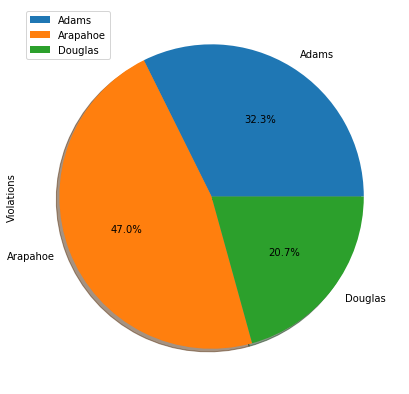

In [13]:
# Percentage of Locations Violations, by County
county_location_violations = df_clean.groupby(["county"])['program_id'].count()
print(county_location_violations)

county_location_violations.to_csv('county_location_violations.csv')

county_location_violations= pd.DataFrame({'Violations': [1276, 1853, 817]},
                              index=['Adams', 'Arapahoe', 'Douglas'])

plot = county_location_violations.plot.pie(y='Violations', autopct='%1.1f%%', shadow=True, figsize=(7,7))

In [14]:
# **WHAT CAN BE USED TO CALL THE DATA FROM CDPHE DATABASE
# FOR VERIFICATION OF CHECK?**

# Connect to SQL/SQLite

In [15]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import sqlite3
import re

In [16]:
# Create Engine
engine = create_engine('sqlite:///../tricounty.sqlite', echo=False)

In [17]:
# Save the Geographic data into sqlite
geographic_df.to_sql('geographic', con=engine, if_exists='replace')

In [18]:
# Save the peDescription data into sqlite
pe_inspections.to_sql('pe_description', con=engine, if_exists='replace')

In [19]:
# Save the Programs data into sqlite
programs_df.to_sql('programs', con=engine, if_exists='replace')

In [20]:
# Save the Risk data into sqlite
restaurant_risk.to_sql('risk', con=engine, if_exists='replace')

In [21]:
# Save the Violations data into sqlite
violations.to_sql('violations', con=engine, if_exists='replace')

In [22]:
# Use the Inspector to explore the database and check/confirm the table names
inspector = inspect(engine)
inspector.get_table_names()

['geographic', 'pe_description', 'programs', 'risk', 'violations']

In [23]:
engine.execute("SELECT * FROM geographic LIMIT 10").fetchall()

[('Adams', 'Arvada', 18),
 ('Adams', 'Aurora', 95),
 ('Adams', 'Bennett', 10),
 ('Adams', 'Brighton', 145),
 ('Adams', 'Broomfield', 2),
 ('Adams', 'Byers', 1),
 ('Adams', 'Commerce City', 134),
 ('Adams', 'Denver', 124),
 ('Adams', 'Eastlake', 2),
 ('Adams', 'Federal Heights', 50)]

In [24]:
engine.execute("SELECT * FROM pe_description LIMIT 10").fetchall()

[('Restaurant (0 - 100 seats)', 1867),
 ('Restaurant (101 - 200 seats)', 514),
 ('Limited Food Service (convenience, other)', 505),
 ('No fee license (K-12 schools, non-profit)', 409),
 ('Restaurant (>200 seats)', 275),
 ('Grocery Store w/ Deli (0 - 15,000 sq. ft.)', 130),
 ('Grocery Store w/ Deli (>15,000 sq. ft.)', 127),
 ('Grocery Store (0 - 15,000 sq. ft.)', 103),
 ('Grocery Store (>15,000 sq. ft.)', 15),
 ('Change of Owner (Initial Inspection) - Food', 1)]

In [25]:
engine.execute("SELECT * FROM programs LIMIT 10").fetchall()

[('1 UP Greenwood Village', 'Arapahoe', '6864 S Clinton Ct', 8),
 ('123 Pho', 'Douglas', '11804 E Oswego St Unit C', 8),
 ('125 Chinese Restaurant', 'Adams', '10255 Washington St', 9),
 ('135 Scoop', 'Arapahoe', '3494 S Federal Blvd', 15),
 ('20 Mile Tap House', 'Douglas', '12543 N Highway 83', 5),
 ('212 Pizza Co', 'Douglas', '848 N Ridge Rd Unit F', 2),
 ('3 Margaritas', 'Adams', '14697 Delaware St Unit 800', 7),
 ('3 Margaritas', 'Adams', '3202 E 104th Ave', 21),
 ('3 Margaritas', 'Adams', '530 E Bromley Ln Unit 125', 12),
 ('3 Margaritas', 'Arapahoe', '25791 E Smoky Hill Rd Ste 100', 7)]

In [26]:
engine.execute("SELECT * FROM risk LIMIT 10").fetchall()

[('High Risk (4)', 'Grocery Store w/ Deli (0 - 15,000 sq. ft.)', 9),
 ('High Risk (4)', 'Grocery Store w/ Deli (>15,000 sq. ft.)', 5),
 ('High Risk (4)', 'No fee license (K-12 schools, non-profit)', 5),
 ('High Risk (4)', 'Restaurant (0 - 100 seats)', 53),
 ('High Risk (4)', 'Restaurant (101 - 200 seats)', 29),
 ('High Risk (4)', 'Restaurant (>200 seats)', 37),
 ('Low Risk (2)', 'Grocery Store (0 - 15,000 sq. ft.)', 17),
 ('Low Risk (2)', 'Grocery Store w/ Deli (0 - 15,000 sq. ft.)', 14),
 ('Low Risk (2)', 'Limited Food Service (convenience, other)', 158),
 ('Low Risk (2)', 'No fee license (K-12 schools, non-profit)', 21)]

In [27]:
engine.execute("SELECT * FROM violations LIMIT 10").fetchall()

[('1 UP Greenwood Village', 'Arapahoe', '6864 S Clinton Ct', 2, 6, 8, 48),
 ('123 Pho', 'Douglas', '11804 E Oswego St Unit C', 4, 4, 8, 48),
 ('125 Chinese Restaurant', 'Adams', '10255 Washington St', 3, 6, 9, 47),
 ('135 Scoop', 'Arapahoe', '3494 S Federal Blvd', 7, 8, 15, 41),
 ('20 Mile Tap House', 'Douglas', '12543 N Highway 83', 1, 4, 5, 51),
 ('212 Pizza Co', 'Douglas', '848 N Ridge Rd Unit F', 2, 0, 2, 54),
 ('3 Margaritas', 'Adams', '14697 Delaware St Unit 800', 3, 4, 7, 49),
 ('3 Margaritas', 'Adams', '3202 E 104th Ave', 12, 9, 21, 35),
 ('3 Margaritas', 'Adams', '530 E Bromley Ln Unit 125', 4, 8, 12, 44),
 ('3 Margaritas', 'Arapahoe', '25791 E Smoky Hill Rd Ste 100', 2, 5, 7, 49)]

# Convert the index to primary keys

In [28]:
# Source code = "https://gist.github.com/RobinL/c27fef037cbd2b24c909d5275b01adfb"

def get_create_table_string(tablename, connection):
    sql = """
    select * from sqlite_master where name = "{}" and type = "table"
    """.format(tablename) 
    result = connection.execute(sql)

    create_table_string = result.fetchmany()[0][4]
    return create_table_string

def add_pk_to_create_table_string(create_table_string, colname):
    regex = "(\n.+{}[^,]+)(,)".format(colname)
    return re.sub(regex, "\\1 PRIMARY KEY,",  create_table_string, count=1)

def add_pk_to_sqlite_table(tablename, index_column, connection):
    cts = get_create_table_string(tablename, connection)
    cts = add_pk_to_create_table_string(cts, index_column)
    template = """
    BEGIN TRANSACTION;
        ALTER TABLE {tablename} RENAME TO {tablename}_old_;

        {cts};

        INSERT INTO {tablename} SELECT * FROM {tablename}_old_;

        DROP TABLE {tablename}_old_;

    COMMIT TRANSACTION;
    """

    create_and_drop_sql = template.format(tablename = tablename, cts = cts)
    connection.executescript(create_and_drop_sql)

In [29]:
# Connect to Tricounty database
con = sqlite3.connect("../tricounty.sqlite")

In [30]:
# Add PK to Tables

In [31]:
add_pk_to_sqlite_table('pe_description', 'loc_description', con)

In [32]:
add_pk_to_sqlite_table('programs', 'index', con)

In [33]:
add_pk_to_sqlite_table('risk', 'index', con)